# 1.Importing Libraries

In [1]:
# Import necessary libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# 2.Reading & Understanding Data
 

In [2]:
# Read the data from csv file

bike = pd.read_csv('day.csv')
# Check the head of the dataset

bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# checking the shape of dataframe

bike.shape

(730, 16)

In [4]:
# describing the columns of dataframe

bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
# get the info about columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking for the null values in column data

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# There is no null value present in data

In [8]:
# checking the column of data
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# checking the size of data

bike.size

11680

In [10]:
# checking the datatypes of data

bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
#check the axes of data

bike.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [12]:
#check the values of data

bike.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [13]:
#check the dimensions of data

bike.ndim

2

In [14]:
# dropping the duplicates

bike.drop_duplicates(inplace=True)

In [15]:
bike.shape

(730, 16)

# There are 730 rows and 16 columns,hence there is no null values or duplicate columne

# 3.Cleaning Data

# -Dropping the unwanted columns

In [16]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business

bike['days_old'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [17]:
# data after dropping columns

bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  days_old  
0   985         0  
1   801         1  
2  1349         2  
3  1562         3  
4  1600         4

In [18]:
# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [19]:
#Inspect data frame after dropping
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

In [20]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [21]:
bike.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [22]:
bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [23]:
bike.corr()


season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   
days_old    4.135867e-01  8.660262e-01  4.982507e-01  0.016275 -0.000023   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   
days_old     -0.004619   -0.021862  0.150738  0.152773  0.016080  -0.112667   

                 cnt  days_old  
season      0.404584  0.413587  
yr          0.569728  0.866026  
mnth        0.278191  0.498251  
holiday    -0.068764  0.016275  
weekday     0.067534 -0.000023  
workingday  0.062542 -0.004619  
weathersit -0.295929 -0.021862  
temp        0.627044  0.150738  
atemp       0.630685  0.152773  
hum        -0.098543  0.016080  
windspeed  -0.235132 -0.112667  
cnt         1.000000  0.629896  
days_old    0.629896  1.000000

# Therefore we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

Handling Missing Values

In [24]:
#Print null counts by column
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

# Therefore are no null values

# 4.Handling Outliers

In [25]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [26]:
#Print number of unique values in all columns
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

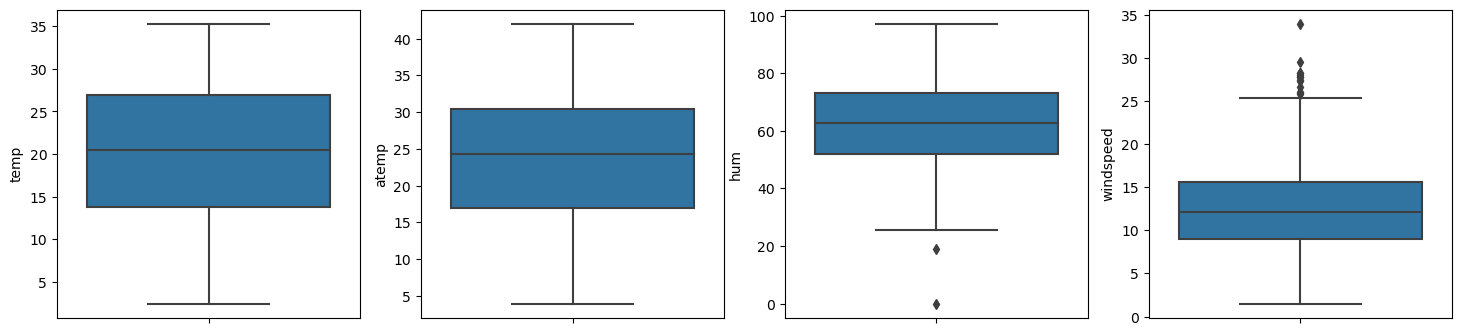

In [27]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

# From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

# 5.EDA

# 5.1-Convert season and weathersit to categorical types

In [28]:
bike['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [29]:
# season has four levels (1:spring, 2:summer, 3:fall, 4:winter)
season = pd.get_dummies(bike['season'])
int_season = season.astype(int)
season_desc = int_season.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
bike = pd.concat((bike, season_desc), axis=1)

In [30]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'spring' and 
# the actual numeric variable 'season'
bike = bike.drop(['season', 'spring'], axis=1)
bike.sample(5)

yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp  \
631   1     9        0        1           1           1  21.080847  25.12565   
211   0     7        0        0           0           1  33.039153  36.48980   
706   1    12        0        6           0           2  15.648347  19.47540   
308   0    11        0        6           0           1  13.393347  16.19270   
129   0     5        0        2           1           1  21.832500  26.13605   

         hum  windspeed   cnt  days_old  summer  fall  winter  
631  49.2917   9.541068  7436       631       0     0       1  
211  48.0833  11.042471  4302       211       0     1       0  
706  91.1250   6.792393  5582       706       0     0       1  
308  51.9167  12.667154  3926       308       0     0       1  
129  48.9167   7.749957  4803       129       1     0       0

In [31]:
bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [32]:
# weathersit has three levels (1:good, 2:moderate, 3:bad)
weathersit = pd.get_dummies(bike['weathersit'])
int_weathersit = weathersit.astype(int)
weathersit_desc = int_weathersit.rename(columns={1:'good', 2:'moderate', 3:'bad'},inplace = False)
bike = pd.concat((bike, weathersit_desc), axis=1)

In [33]:
# As we don't need the Feature 'weathersit' now as we have already expanded so we can drop it
bike = bike.drop('weathersit',axis=1)

In [34]:
bike.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  days_old  summer  fall  winter  good  moderate  bad  
0  10.749882   985         0       0     0       0     0         1    0  
1  16.652113   801         1       0     0       0     0         1    0  
2  16.636703  1349         2       0     0       0     1         0    0  
3  10.739832  1562         3       0     0       0     1         0    0  
4  12.522300  1600         4       0     0       0     1         0    0

In [35]:
bike['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [36]:
# Month has 12 levels (1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec')
month = pd.get_dummies(bike['mnth'])
int_month = month.astype(int)
month_desc = int_month.rename(columns={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',
                                       8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
bike = pd.concat((bike, month_desc), axis=1)

In [37]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'Jan' and 
# the actual numeric variable 'mnth'
bike = bike.drop(['mnth', 'Jan'], axis=1)
bike.sample(5)

yr  holiday  weekday  workingday       temp     atemp      hum  \
546   1        0        0           0  33.449153  37.53145  51.8750   
394   1        0        1           1  11.035847  13.13125  40.0833   
18    0        0        3           1  11.979134  14.92110  74.1739   
591   1        0        3           1  28.973347  32.70185  61.9583   
693   1        0        0           0  10.079153  12.87915  46.8333   

     windspeed   cnt  days_old  ...  March  April  May  June  July  Aug  Sep  \
546  11.291443  5531       546  ...      0      0    0     0     1    0    0   
394  14.458064  3624       394  ...      0      0    0     0     0    0    0   
18   13.957239  1650        18  ...      0      0    0     0     0    0    0   
591  11.374657  7347       591  ...      0      0    0     0     0    1    0   
693  10.083500  2424       693  ...      0      0    0     0     0    0    0   

     Oct  Nov  Dec  
546    0    0    0  
394    0    0    0  
18     0    0    0  
591    0    0    0  
693    0    1    0  

[5 rows x 27 columns]

In [38]:
# weekday has seven levels (1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday')
weekday = pd.get_dummies(bike['weekday'])
int_weekday = weekday.astype(int)
weekday_desc = int_weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',
                                           6:'Saturday',0:'Sunday'},inplace = False)
bike = pd.concat((bike, weekday_desc), axis=1)

In [39]:
bike.dtypes

yr              int64
holiday         int64
weekday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
days_old        int64
summer          int64
fall            int64
winter          int64
good            int64
moderate        int64
bad             int64
Feb             int64
March           int64
April           int64
May             int64
June            int64
July            int64
Aug             int64
Sep             int64
Oct             int64
Nov             int64
Dec             int64
Sunday          int64
Monday          int64
Tuesday         int64
Wednesday       int64
Thrusday        int64
Friday          int64
Saturday        int64
dtype: object

In [40]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'Sunday' and 
# the actual numeric variable 'weekday'
bike = bike.drop(['weekday','Sunday'],axis=1)
bike.sample(5)

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
554   1        0           1  29.144153  32.70270  68.3333  12.125325  6569   
688   1        0           1  15.340847  19.03335  68.5000   5.542575  5634   
365   1        0           0  15.170000  18.78105  69.2500  12.875189  2294   
534   1        0           1  28.221653  32.73460  69.0000   9.917139  6825   
369   1        0           1  10.899153  13.92060  52.4167   8.709129  3272   

     days_old  summer  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  Wednesday  \
554       554       0  ...    0    0    0    0       1        0          0   
688       688       0  ...    0    0    1    0       0        1          0   
365       365       0  ...    0    0    0    0       0        0          0   
534       534       1  ...    0    0    0    0       0        1          0   
369       369       0  ...    0    0    0    0       0        0          0   

     Thrusday  Friday  Saturday  
554         0       0         0  
688         0       0         0  
365         0       0         0  
534         0       0         0  
369         1       0         0  

[5 rows x 32 columns]

In [41]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   days_old    730 non-null    int64  
 9   summer      730 non-null    int64  
 10  fall        730 non-null    int64  
 11  winter      730 non-null    int64  
 12  good        730 non-null    int64  
 13  moderate    730 non-null    int64  
 14  bad         730 non-null    int64  
 15  Feb         730 non-null    int64  
 16  March       730 non-null    int64  
 17  April       730 non-null    int64  
 18  May         730 non-null    int64  
 19  June        730 non-null    i

# 5.2 Draw pair Plots to check the linear relationship

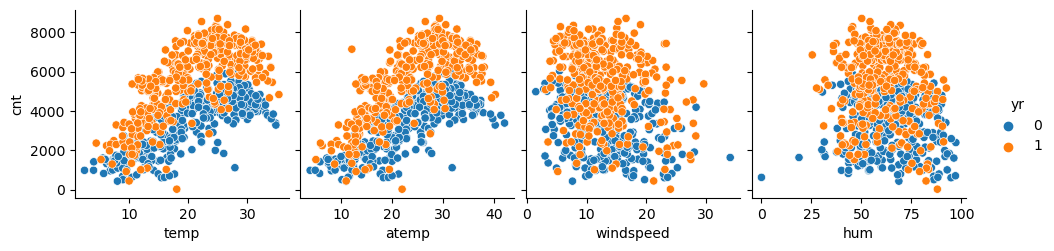

In [42]:
# Visualization of Relationship of Numerical Features against Target Variable
sns.pairplot(bike, x_vars=["temp",'atemp', 'windspeed',"hum"],y_vars=['cnt'],hue ='yr')
plt.show()

<Figure size 1500x3000 with 0 Axes>

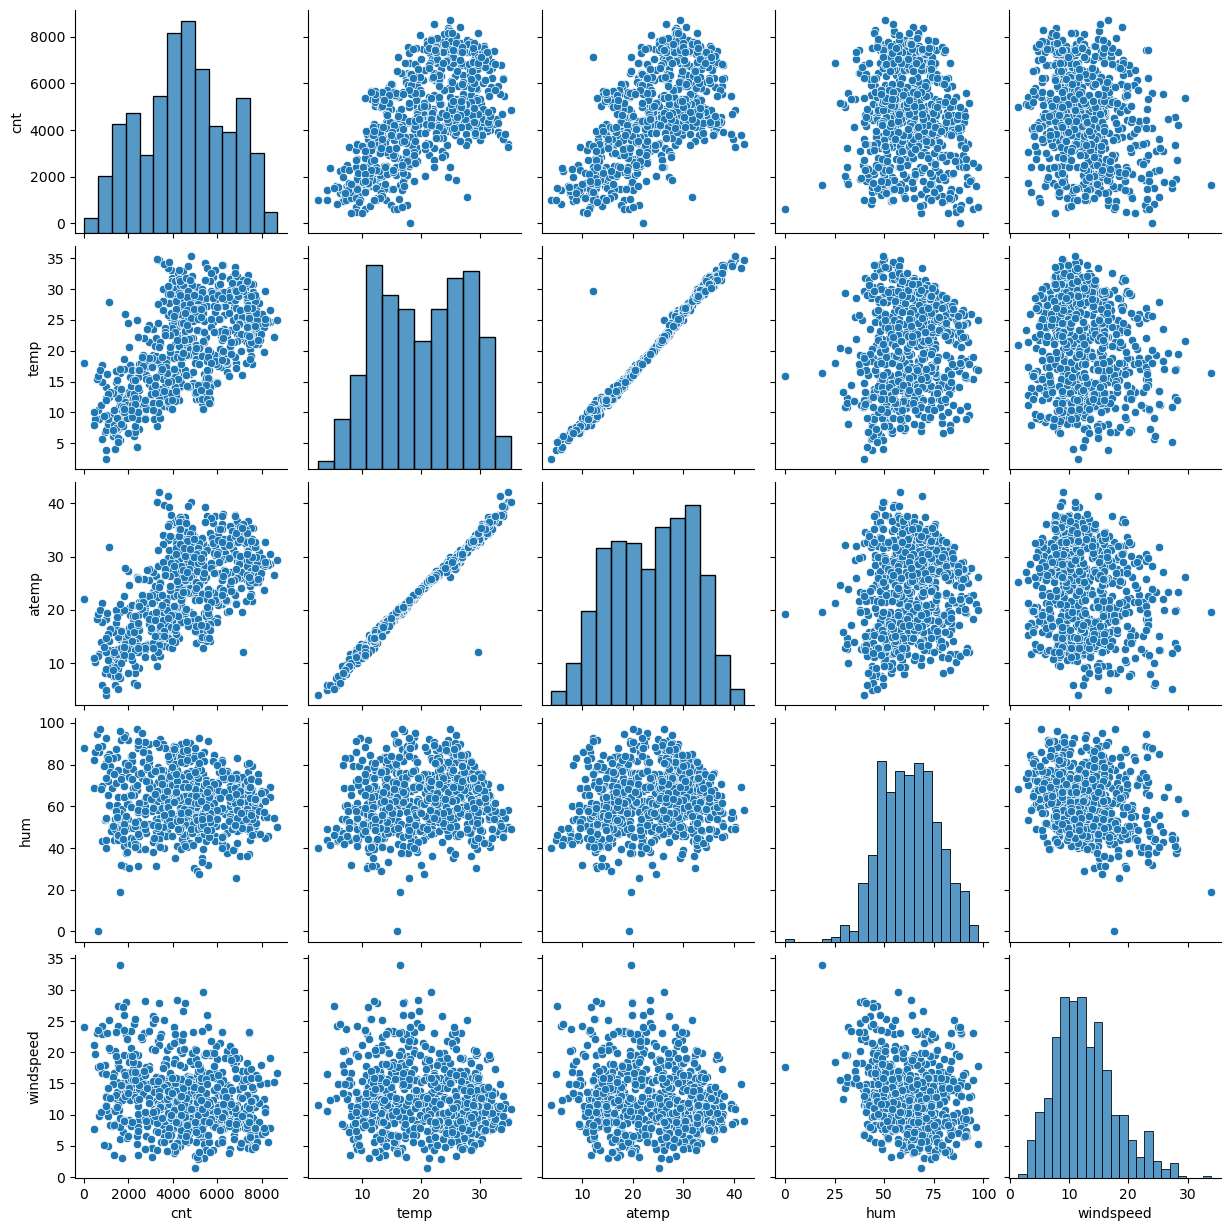

In [43]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

# Inferences
 -temp and atemp has the highest corelation with the target variable cnt
    
 -temp and atemp are highly co-related with each other


# Correlation map indicates that output variable has a linear relationship with variables like temp, atemp.

# 5.3 Visualising the Data to Find the Correlation between the Numerical Variable

In [44]:
plt.figure(figsize=(20,15))
sns.pairplot(bike)
plt.show()

<Figure size 2000x1500 with 0 Axes>

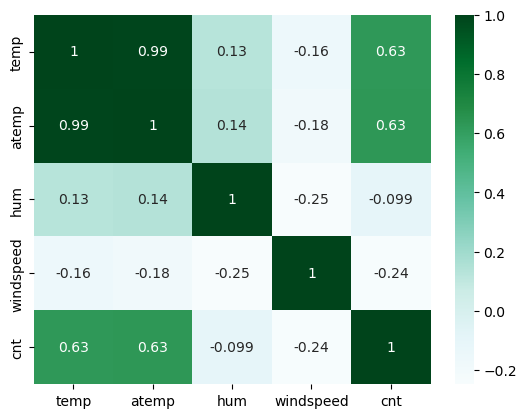

In [45]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [46]:
bike.dtypes


yr              int64
holiday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
days_old        int64
summer          int64
fall            int64
winter          int64
good            int64
moderate        int64
bad             int64
Feb             int64
March           int64
April           int64
May             int64
June            int64
July            int64
Aug             int64
Sep             int64
Oct             int64
Nov             int64
Dec             int64
Monday          int64
Tuesday         int64
Wednesday       int64
Thrusday        int64
Friday          int64
Saturday        int64
dtype: object

# Inferences
-temp and atemp has correlation more than .99 means almost 1 (highly correlated)

-atemp seems to be derived from temp so atemp field can be dropped here only

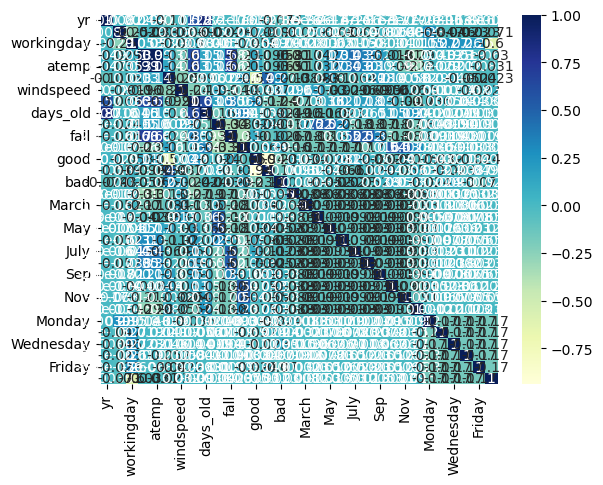

In [53]:
#Correlations for numeric variables
cor=bike.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

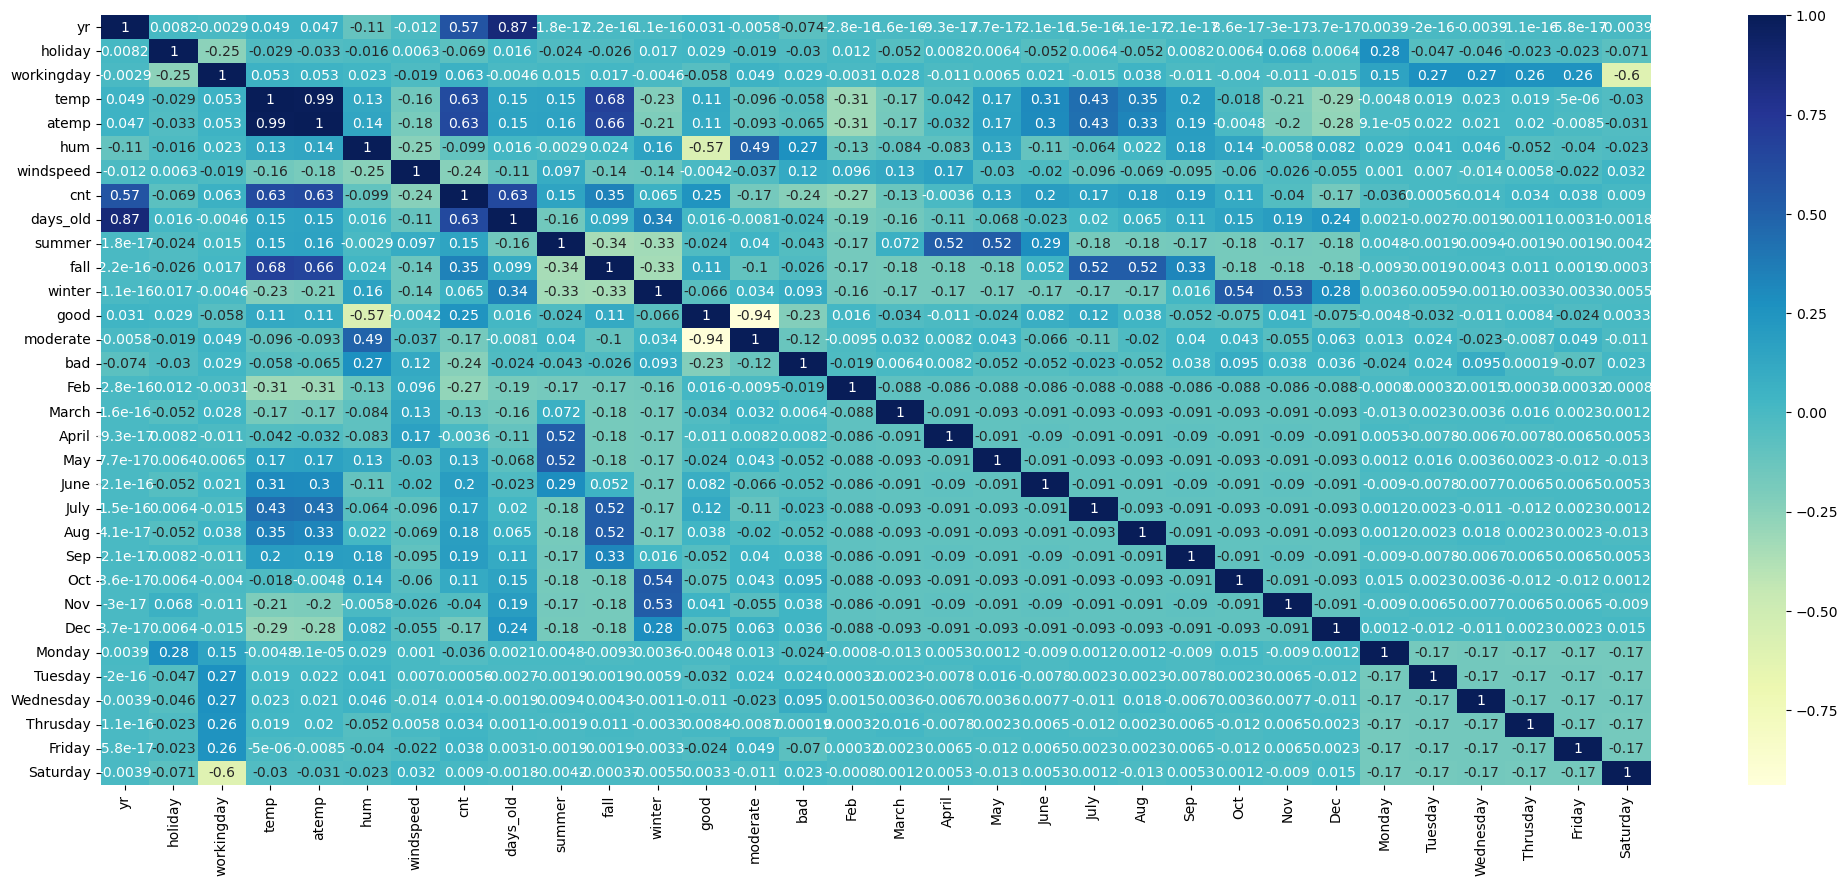

In [54]:
#Calculate Correlation
corr = bike.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

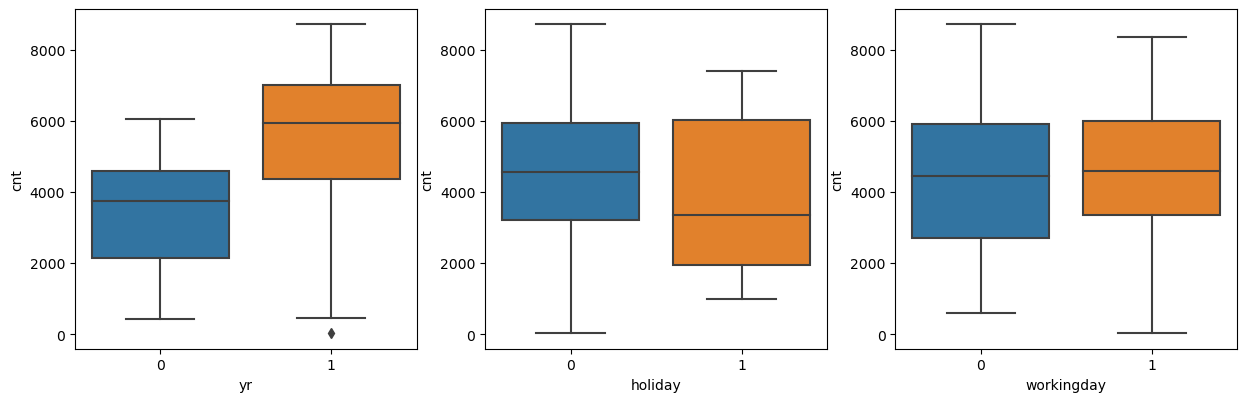

In [59]:
 # Boxplot for categorical variables to see demands
vars_cat = ['yr','holiday','workingday']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()


# Inferences

In [60]:
# Here many insights can be drawn from the plots

# Season: 3:fall has highest demand for rental bikes
# I see that demand for next year has grown
# Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
# When there is a holiday, demand has decreased.
# Weekday is not giving clear picture abount demand.
# The clear weathershit has highest demand
# During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

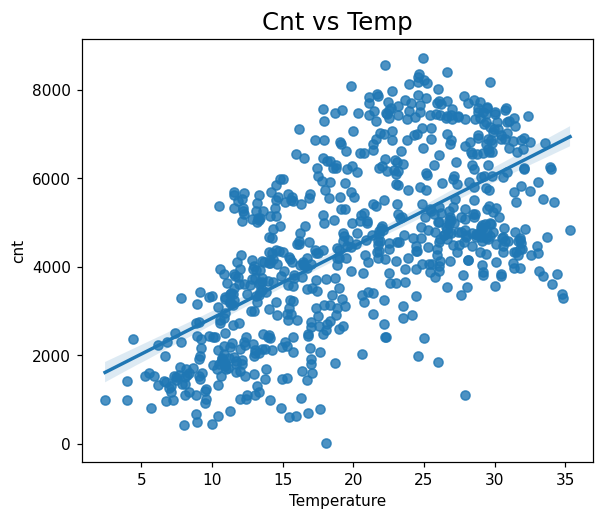

In [61]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()


# Inferences

In [62]:
# Demand for bikes is positively correlated to temp.
# We can see that cnt is linearly increasing with temp indicating linear relation.

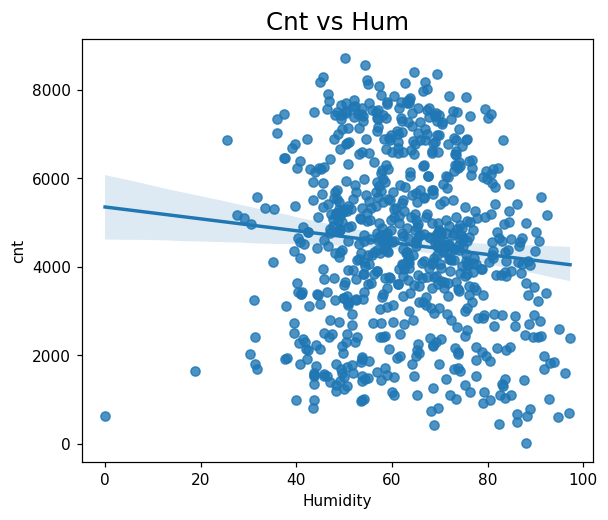

In [63]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

# Inferences

In [64]:
# Hum is values are more scattered around.
# Although we can see cnt decreasing with increase in humidity.

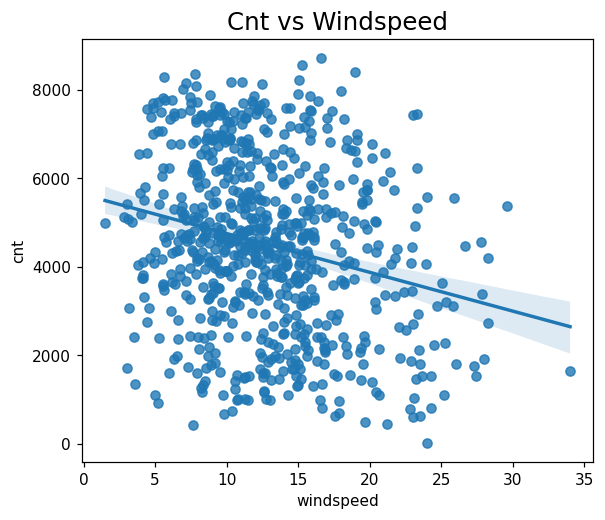

In [65]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike,y="cnt",x="windspeed")
plt.show()

# Inferences

In [66]:
# Windspeed is values are more scattered around.
# Although we can see cnt decreasing with increase in windspeed

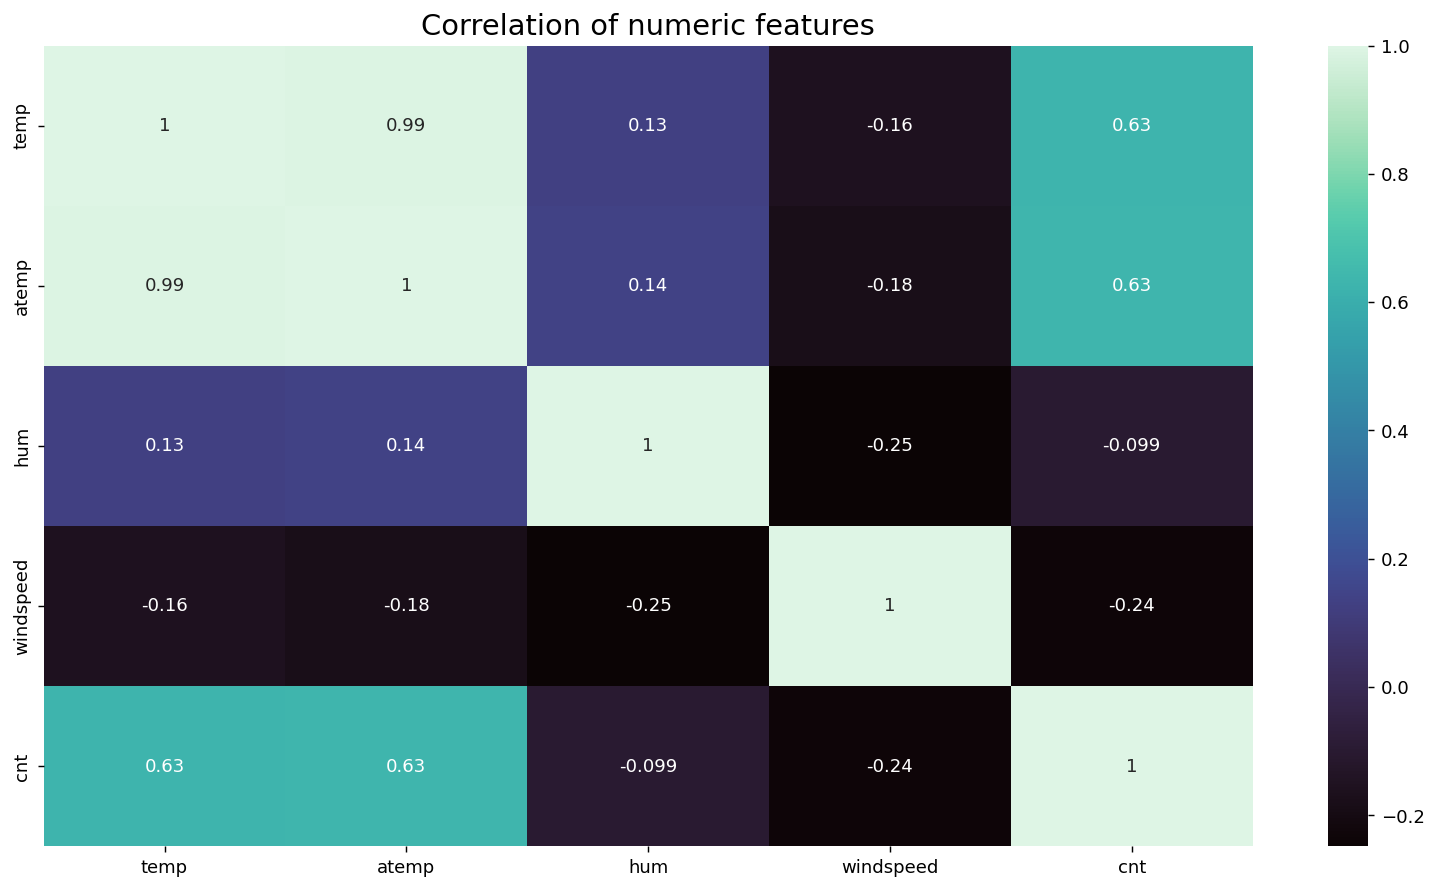

In [67]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bike[num_features].corr(),annot= True,cmap="mako")
plt.show()

# Inferences

In [68]:
# Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
# Temp and Atemp also have high correlation with cnt variable

In [69]:
bike.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt    days_old      summer  ...         Sep  \
count  730.000000   730.000000  730.000000  730.000000  ...  730.000000   
mean    12.763620  4508.006849  364.500000    0.252055  ...    0.082192   
std      5.195841  1936.011647  210.877136    0.434490  ...    0.274845   
min      1.500244    22.000000    0.000000    0.000000  ...    0.000000   
25%      9.041650  3169.750000  182.250000    0.000000  ...    0.000000   
50%     12.125325  4548.500000  364.500000    0.000000  ...    0.000000   
75%     15.625589  5966.000000  546.750000    1.000000  ...    0.000000   
max     34.000021  8714.000000  729.000000    1.000000  ...    1.000000   

              Oct         Nov         Dec      Monday     Tuesday   Wednesday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.084932    0.082192    0.084932    0.143836    0.142466    0.141096   
std      0.278971    0.274845    0.278971    0.351164    0.349767    0.348359   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Thrusday      Friday    Saturday  
count  730.000000  730.000000  730.000000  
mean     0.142466    0.142466    0.143836  
std      0.349767    0.349767    0.351164  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 32 columns]

# 7. Model Building

# 7.1 Split Data into training and test

In [71]:
# Checking shape before splitting

bike.shape

(730, 32)

In [72]:
#y to contain only target variable
y=bike.pop('cnt')

#X is all remainign variable also our independent variables
X=bike

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
#Inspect independent variables
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days_old  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882         0   
1   0        0           0  14.902598  17.68695  69.6087  16.652113         1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703         2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832         3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300         4   

   summer  fall  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  Wednesday  \
0       0     0  ...    0    0    0    0       0        0          0   
1       0     0  ...    0    0    0    0       0        0          0   
2       0     0  ...    0    0    0    0       1        0          0   
3       0     0  ...    0    0    0    0       0        1          0   
4       0     0  ...    0    0    0    0       0        0          1   

   Thrusday  Friday  Saturday  
0         0       0         1  
1         0       0         0  
2         0       0         0  
3         0       0         0  
4         0       0         0  

[5 rows x 31 columns]

In [74]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


# 7.2 Feature Scaling continuous variables

In [75]:
# To make all features in same scale to interpret easily

#Following columns are continous to be scaled temp,hum,windspeed

In [76]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [77]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [78]:
#Inspect stats fro Training set after scaling

X_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.520548    0.027397    0.669276    0.550874    0.526518    0.654174   
std      0.500067    0.163398    0.470935    0.227231    0.212976    0.143648   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354221    0.353207    0.544598   
50%      1.000000    0.000000    1.000000    0.575304    0.563297    0.659940   
75%      1.000000    0.000000    1.000000    0.745079    0.698389    0.756977   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed    days_old      summer        fall  ...        Sep  \
count  511.000000  511.000000  511.000000  511.000000  ...  511.00000   
mean     0.414873  373.545988    0.258317    0.260274  ...    0.09002   
std      0.185619  213.063061    0.438138    0.439214  ...    0.28649   
min      0.000000    0.000000    0.000000    0.000000  ...    0.00000   
25%      0.281934  185.500000    0.000000    0.000000  ...    0.00000   
50%      0.384732  380.000000    0.000000    0.000000  ...    0.00000   
75%      0.526481  561.500000    1.000000    1.000000  ...    0.00000   
max      1.000000  729.000000    1.000000    1.000000  ...    1.00000   

             Oct         Nov         Dec      Monday     Tuesday   Wednesday  \
count  511.00000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.09002    0.091977    0.074364    0.148728    0.131115    0.140900   
std      0.28649    0.289276    0.262619    0.356169    0.337857    0.348259   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Thrusday      Friday    Saturday  
count  511.000000  511.000000  511.000000  
mean     0.146771    0.129159    0.150685  
std      0.354224    0.335704    0.358092  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 31 columns]

In [79]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  0.322150  0.639330   0.327101   
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   

     days_old  summer  fall  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  \
683       683       0     0  ...    0    0    1    0       0        0   
645       645       0     0  ...    0    1    0    0       1        0   
163       163       1     0  ...    0    0    0    0       1        0   
360       360       0     0  ...    0    0    0    1       0        1   
640       640       0     0  ...    0    1    0    0       0        0   

     Wednesday  Thrusday  Friday  Saturday  
683          0         1       0         0  
645          0         0       0         0  
163          0         0       0         0  
360          0         0       0         0  
640          1         0       0         0  

[5 rows x 31 columns]

# 7.3 Build a Model using RFE and Automated approach

In [80]:
# Use RFE to eliminate some columns

In [81]:
# Build a Lienar Regression model using SKLearn for RFE

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
#Cut down number of features to 15 using automated approac
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [83]:
#Columns selected by RFE and their weights
list(zip(X_train.columns))

[('yr',),
 ('holiday',),
 ('workingday',),
 ('temp',),
 ('atemp',),
 ('hum',),
 ('windspeed',),
 ('days_old',),
 ('summer',),
 ('fall',),
 ('winter',),
 ('good',),
 ('moderate',),
 ('bad',),
 ('Feb',),
 ('March',),
 ('April',),
 ('May',),
 ('June',),
 ('July',),
 ('Aug',),
 ('Sep',),
 ('Oct',),
 ('Nov',),
 ('Dec',),
 ('Monday',),
 ('Tuesday',),
 ('Wednesday',),
 ('Thrusday',),
 ('Friday',),
 ('Saturday',)]

# 7.4 Manual Elimination

# Function to build a model using statsmodel api

In [84]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

# Function to calculate VIFs and print them

In [85]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [86]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_old', 'summer', 'fall', 'winter', 'good', 'moderate', 'bad',
       'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday',
       'Saturday'],
      dtype='object')

In [87]:
# Features not selected by RFE
X_train.columns # [rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_old', 'summer', 'fall', 'winter', 'good', 'moderate', 'bad',
       'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday',
       'Saturday'],
      dtype='object')

In [90]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'July', 'Sep', 'Saturday',
       'bad', 'moderate']]

In [91]:
X_train_rfe.shape

(511, 14)

# 8.Build Model

# Model 1

In [93]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'July', 'Sep', 'Saturday',
       'bad', 'moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.59e-184
Time:                        22:41:59   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1570.9302    270.127      5.816      0.0

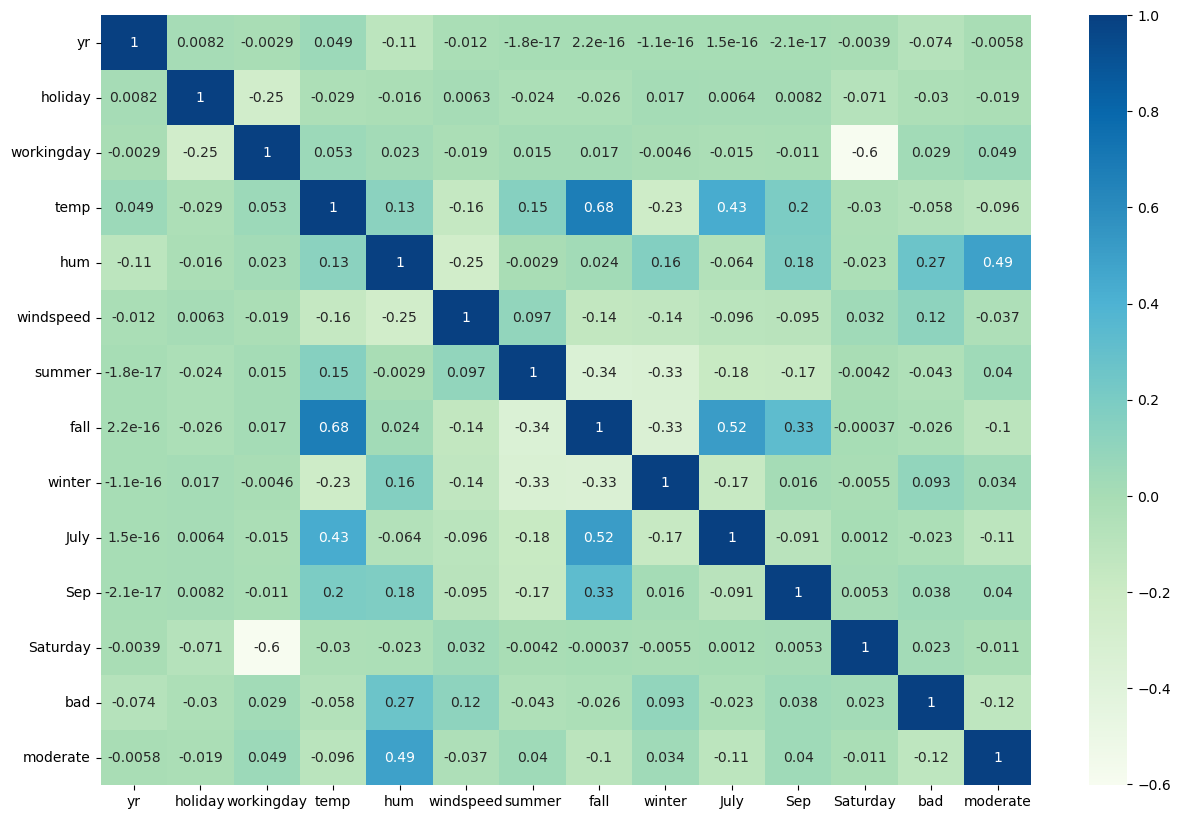

In [94]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'July', 'Sep', 'Saturday',
       'bad', 'moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

# Model 2

# All the columns have p-value > .05 so checking VIFs

In [100]:
# Dropping the variable hum as it has very high VIF and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'summer', 'fall', 'winter', 'July', 'Sep', 'Saturday',
       'bad', 'moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.46e-181
Time:                        22:46:15   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        706.6926    178.120      3.968      0.0

# Model 3

In [102]:
# adding temp and removed 'season_summer' and 'workingday'. Removing fall due to high VIF
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'winter', 'July', 'Sep', 'Saturday',
       'bad', 'moderate']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     185.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.92e-168
Time:                        22:49:14   Log-Likelihood:                -4177.5
No. Observations:                 511   AIC:                             8379.
Df Residuals:                     499   BIC:                             8430.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        543.9716    187.705      2.898      0.0

In [103]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [104]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'winter', 'July', 'Sep', 'Saturday',
       'bad', 'moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

543.9716327880856 [ 1984.99701407  -482.04232096   345.28481546  5481.3788205
  -642.04731434   982.26237555  -625.35385769   453.69055893
   425.04524688 -2165.17748379  -650.24850406]


# 9.Model Evaluation

# 9.1Residucal Analysis

In [105]:
y_train_pred = lr.predict(X_train[cols])

In [106]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

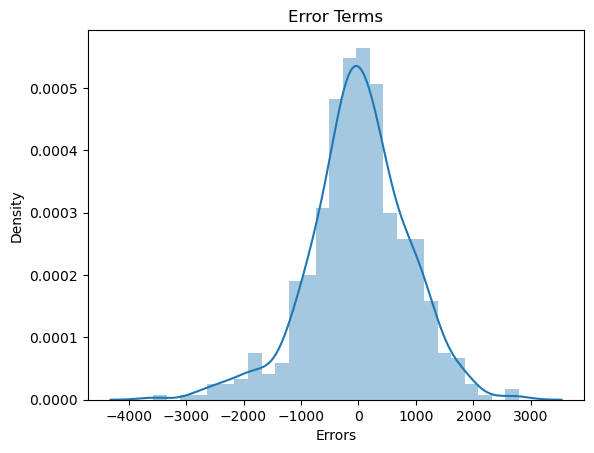

In [107]:
plot_res_dist(y_train, y_train_pred)

# Errors are normally distribured here with mean 0. So everything seems to be fine

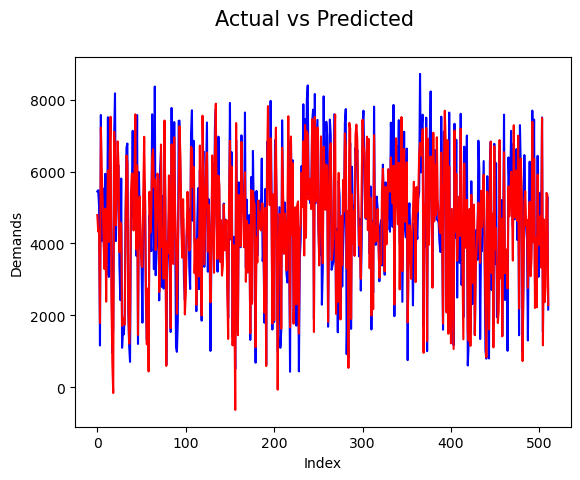

In [108]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Actual and Predicted result following almost the same pattern so this model seems ok

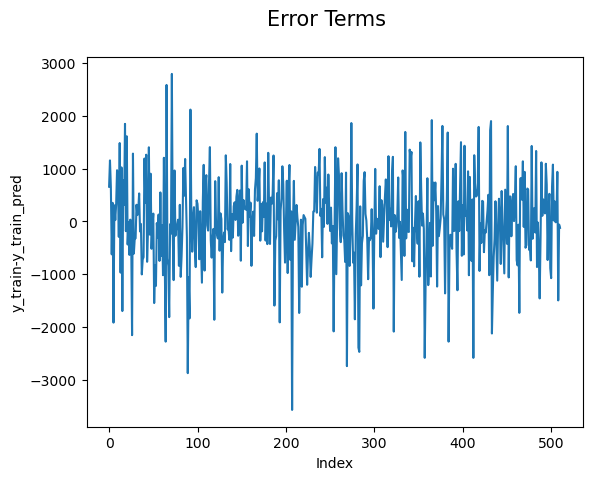

In [109]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

# Here,If we see the error terms are independent of each other.

In [110]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8030708415612459

# Inferences

# R2 Same as we obtained for our final model

# 9.2 Linearity Check

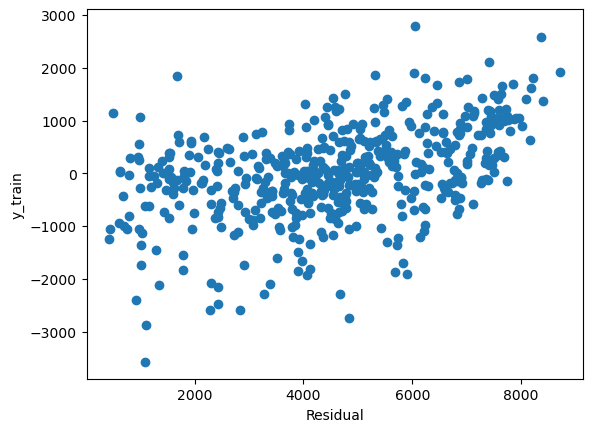

In [111]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# 9.3 Predict values for test data set

In [112]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [114]:
#Columns from our final model
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'winter', 'July', 'Sep', 'Saturday',
       'bad', 'moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

# 9.4 R-Squared value for test predictions

In [115]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.818232185261597

# 9.5 Homoscedacity

# Inferences

# R2 value for predictions on test data (0.803) is almost same as R2 value of train data(0.799). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

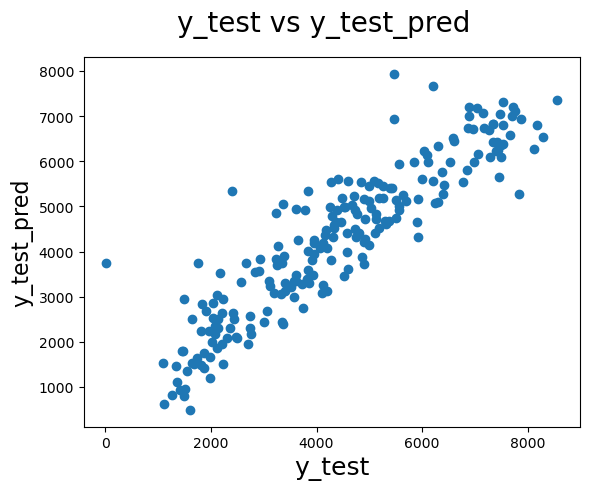

In [116]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

# Inferences

# We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes

# 9.6 Plot Test vs Predicted test values

In [117]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

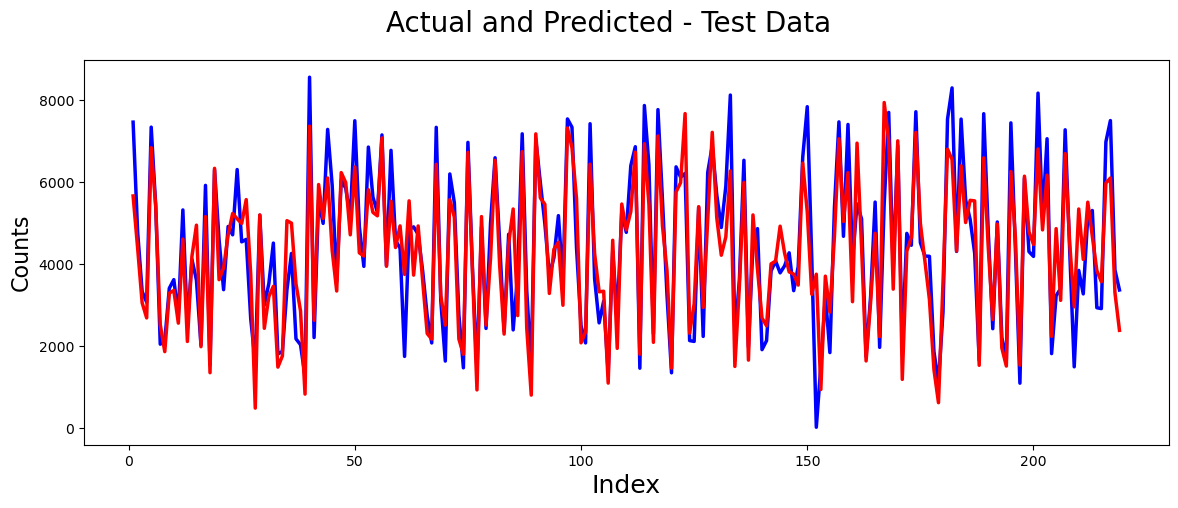

In [118]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

# Inferences

# As we can see predictions for test data is very close to actuals

# 9.7 Plot Error Terms for test data

In [119]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

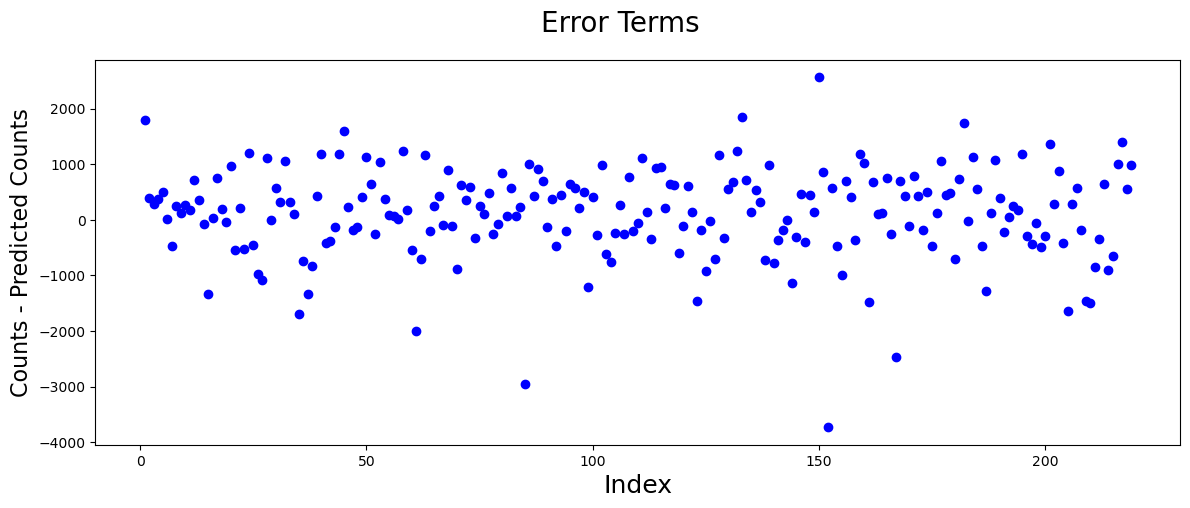

In [120]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

# Inferences

# s we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

# 10.Making Predictions

In [121]:
# Checking data before scaling
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days_old  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882         0   
1   0        0           0  14.902598  17.68695  69.6087  16.652113         1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703         2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832         3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300         4   

   summer  fall  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  Wednesday  \
0       0     0  ...    0    0    0    0       0        0          0   
1       0     0  ...    0    0    0    0       0        0          0   
2       0     0  ...    0    0    0    0       1        0          0   
3       0     0  ...    0    0    0    0       0        1          0   
4       0     0  ...    0    0    0    0       0        0          1   

   Thrusday  Friday  Saturday  
0         0       0         1  
1         0       0         0  
2         0       0         0  
3         0       0         0  
4         0       0         0  

[5 rows x 31 columns]

# 8.1 Intrepretting the Model
# Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [123]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'winter', 'July', 'Sep', 'Saturday',
       'bad', 'moderate']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     185.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.92e-168
Time:                        22:52:22   Log-Likelihood:                -4177.5
No. Observations:                 511   AIC:                             8379.
Df Residuals:                     499   BIC:                             8430.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        543.9716    187.705      2.898      0.0